In [1]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.1, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [2]:
  # load dataset
trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
#trainX, testX = prep_pixels(trainX, testX)
	# define model
#model = define_model()
	# create data generator
#datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,)
	# prepare iterator
#it_train = datagen.flow(trainX, trainY, batch_size=128)
	# fit model
#steps = int(trainX.shape[0] / 128)
#history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1)
	

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

In [4]:
trainX.shape

(50000, 32, 32, 3)

In [5]:
#trainX=trainX[:10000,:,:,:]

In [6]:
trainX.shape

(50000, 32, 32, 3)

In [7]:
#trainY=trainY[:10000,:]

In [8]:
trainY.shape

(50000, 10)

In [9]:
#testX=testX[:2000,:,:,:]

In [10]:
testX.shape

(10000, 32, 32, 3)

In [11]:
#testY=testY[:2000,:]

In [12]:
testY.shape

(10000, 10)

In [13]:
# define model
model = define_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,zoom_range=0.3,rotation_range=15)

In [15]:
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=128)

In [16]:
# fit model
steps = int(trainX.shape[0] / 128)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/100
390/390 [==============================] - 39s 67ms/step - loss: 1.7987 - accuracy: 0.3546 - val_loss: 1.4982 - val_accuracy: 0.4501
Epoch 2/100
390/390 [==============================] - 26s 68ms/step - loss: 1.4737 - accuracy: 0.4638 - val_loss: 1.4164 - val_accuracy: 0.4951
Epoch 3/100
390/390 [==============================] - 26s 66ms/step - loss: 1.3213 - accuracy: 0.5244 - val_loss: 1.1912 - val_accuracy: 0.5761
Epoch 4/100
390/390 [==============================] - 25s 65ms/step - loss: 1.2011 - accuracy: 0.5720 - val_loss: 1.2248 - val_accuracy: 0.5651
Epoch 5/100
390/390 [==============================] - 25s 64ms/step - loss: 1.1176 - accuracy: 0.6029 - val_loss: 1.1690 - val_accuracy: 0.6073
Epoch 6/100
390/390 [==============================] - 26s 67ms/step - loss: 1.0402 - accuracy: 0.6343 - val_loss: 1.2508 - val_accuracy: 0.6109
Epoch 7/100
390/390 [==============================] - 25s 65ms/step - loss: 0.9951 - accuracy: 0.6527 - val_loss: 0.8309 - val_ac

In [17]:
y_pred=model.predict(testX)
y_pred

array([[4.53930079e-05, 1.52022956e-04, 2.38418957e-04, ...,
        5.43538190e-05, 1.47532293e-04, 1.94014938e-05],
       [3.75414675e-06, 3.39027756e-05, 3.85964649e-10, ...,
        1.35710245e-11, 9.99962330e-01, 3.62362123e-08],
       [5.12572660e-05, 7.47350627e-04, 5.41493364e-06, ...,
        3.26631903e-06, 9.99073863e-01, 5.56453961e-05],
       ...,
       [1.79964683e-08, 4.80154199e-07, 3.94765630e-05, ...,
        8.91957188e-06, 1.43506372e-06, 6.12005408e-07],
       [2.94983721e-07, 9.99997020e-01, 2.37352609e-08, ...,
        1.30916089e-09, 2.83631692e-07, 2.07289349e-06],
       [1.49722084e-07, 6.82301682e-09, 1.96977862e-06, ...,
        9.99650121e-01, 3.38261530e-09, 1.10962253e-08]], dtype=float32)

In [18]:
import numpy as np

In [19]:
pred_classes=[np.argmax(x)for x in y_pred]

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
testY=np.argmax(testY, axis=1)
print("Classification Report: \n", classification_report(testY,pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1000
           1       0.93      0.96      0.95      1000
           2       0.90      0.80      0.85      1000
           3       0.79      0.78      0.79      1000
           4       0.85      0.90      0.87      1000
           5       0.92      0.72      0.81      1000
           6       0.80      0.96      0.87      1000
           7       0.90      0.92      0.91      1000
           8       0.93      0.95      0.94      1000
           9       0.89      0.94      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



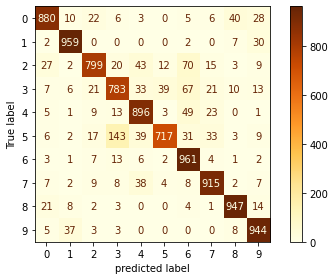

In [21]:

ConfusionMatrixDisplay.from_predictions(testY, 
                                                pred_classes,
                                                cmap=plt.cm.YlOrBr)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('predicted label')
plt.tight_layout()
plt.savefig('classification_1.png', dpi=300)  

In [25]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [26]:
a=load_image('deer.png')

In [29]:
a

array([[[[0.05490196, 0.03921569, 0.02352941],
         [0.0627451 , 0.04705882, 0.03529412],
         [0.05882353, 0.03529412, 0.02352941],
         ...,
         [0.6862745 , 0.78039217, 0.8       ],
         [0.10196079, 0.10980392, 0.05490196],
         [0.09411765, 0.1764706 , 0.12941177]],

        [[0.24705882, 0.3372549 , 0.3764706 ],
         [0.05098039, 0.03137255, 0.01960784],
         [0.05098039, 0.03137255, 0.01960784],
         ...,
         [0.6627451 , 0.7607843 , 0.7607843 ],
         [0.09803922, 0.11372549, 0.08235294],
         [0.14901961, 0.33333334, 0.24705882]],

        [[0.08235294, 0.16862746, 0.12156863],
         [0.05490196, 0.03529412, 0.03137255],
         [0.05490196, 0.03921569, 0.02352941],
         ...,
         [0.06666667, 0.16078432, 0.12156863],
         [0.10980392, 0.18039216, 0.14117648],
         [0.05490196, 0.27058825, 0.10196079]],

        ...,

        [[0.07450981, 0.16470589, 0.10980392],
         [0.0627451 , 0.05490196, 0.04705882]

In [27]:
# predict the class
y_pred = model.predict(a)
y_pred



array([[1.0519544e-04, 6.1196326e-05, 2.5490053e-02, 7.5814580e-03,
        1.4981605e-01, 3.4958115e-04, 8.1567061e-01, 2.7124971e-04,
        5.5321241e-05, 5.9915782e-04]], dtype=float32)

In [28]:
pred_class=[np.argmax(x)for x in y_pred]
pred_class

[6]